<a href="https://colab.research.google.com/github/BingHungLee/BHAI-Daily-Practice/blob/main/%5B20210707%5D_CoolProp_Fluid_Properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Reference Site


*   http://www.coolprop.org/coolprop/HighLevelAPI.html ### Table of string inputs to PropsSI function
*   http://www.coolprop.org/coolprop/HighLevelAPI.html#parameter-table ### More examples of the high-level API
* http://www.coolprop.org/coolprop/HighLevelAPI.html#props-sample


In [1]:
!pip install CoolProp

     |████████████████████████████████| 4.2MB 4.0MB/s 


In [2]:
import CoolProp as CP
print(CP.__version__)

6.4.1


## Saturated Properties

In [3]:
# Import the PropsSI function
from CoolProp.CoolProp import PropsSI

In [5]:
# Saturated Properties

# Saturated vapor enthalpy of Water at 1 atm in J/kg-K
H_V = PropsSI('H','P',101325,'Q',1,'Water'); print("Saturated vapor enthalpy :" ,H_V)
# Saturated liquid enthalpy of Water at 1 atm in J/kg-K
H_L = PropsSI('H','P',101325,'Q',0,'Water'); print("Saturated liquid enthalpy :" ,H_L)
# Latent heat of vaporization of Water at 1 atm in J/kg-K
print("Latent Heat :" ,H_V - H_L)

Saturated vapor enthalpy : 2675529.3255007486
Saturated liquid enthalpy : 419057.7330940691
Latent Heat : 2256471.5924066794


## Imposing the Phase

In [6]:
# Imposing the Phase
# Get the density of Water at T = 461.1 K and P = 5.0e6 Pa, imposing the liquid phase
print(PropsSI('D','T|liquid',461.1,'P',5e6,'Water'))
# Get the density of Water at T = 597.9 K and P = 5.0e6 Pa, imposing the gas phase
print(PropsSI('D','T',597.9,'P|gas',5e6,'Water'))

881.000853334732
20.508496070580005


## Trivial Inputs

In [7]:
import CoolProp.CoolProp as CP
#n order to obtain trivial inputs that do not depend on the thermodynamic state
CP.PropsSI("Tcrit","Water")

647.096

## PhaseSI Function

In [8]:
import CoolProp.CoolProp as CP
#PhaseSI Function
CP.PhaseSI('P',101325,'Q',0,'Water')

'twophase'

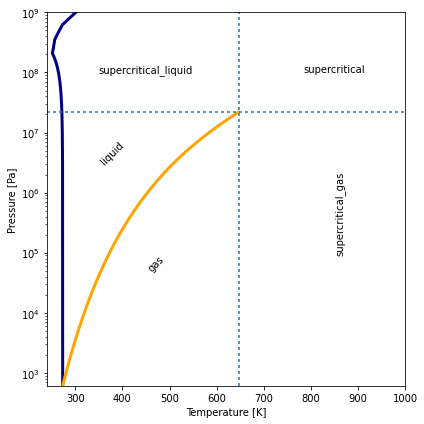

In [9]:
import matplotlib
import numpy as np
import CoolProp as CP
import matplotlib.pyplot as plt
import scipy.interpolate

Water = CP.AbstractState("HEOS", "Water")
pc = Water.keyed_output(CP.iP_critical)
Tc = Water.keyed_output(CP.iT_critical)
Tmin = 200
Tmax = 1000
pmax = Water.keyed_output(CP.iP_max)
pt = 611.657
Tt = 273.16
fillcolor = 'g'

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
lw = 3

# --------------
# Melting curve
# --------------
melt_args = dict(lw = lw, solid_capstyle = 'round')
TT = []
PP = list(np.logspace(np.log10(pt), np.log10(pmax),1000))
for p in PP:
    TT.append(Water.melting_line(CP.iT, CP.iP, p))

#Zone VI
for T in np.linspace(max(TT), 355):
    TT.append(T)
    theta = T/273.31
    pi = 1-1.07476*(1-theta**4.6)
    p = pi*632.4e6
    PP.append(p)

plt.plot(TT,PP,'darkblue',**melt_args)

# ----------------
# Saturation curve
# ----------------
Ts = np.linspace(273.16, Tc, 1000)
ps = CP.CoolProp.PropsSI('P','T',Ts,'Q',0,'Water')

# ------
# Labels
# ------

plt.plot(Ts,ps,'orange',lw = lw, solid_capstyle = 'round')

# Critical lines
plt.axvline(Tc, dashes = [2, 2])
plt.axhline(pc, dashes = [2, 2])

# Labels
plt.text(850, 1e8, 'supercritical',ha= 'center')
plt.text(850, 1e5, 'supercritical_gas', rotation = 90)
plt.text(450, 1e8, 'supercritical_liquid', rotation = 0, ha = 'center')
plt.text(350, 3e6, 'liquid', rotation = 45)
plt.text(450, 5e4, 'gas', rotation = 45)

plt.ylim(611,1e9)
plt.gca().set_yscale('log')
plt.gca().set_xlim(240, 1000)
plt.ylabel('Pressure [Pa]')
plt.xlabel('Temperature [K]')
plt.tight_layout()

## Partial Derivatives

In [10]:
#Partial Derivatives
import CoolProp.CoolProp as CP
# c_p using c_p
print(CP.PropsSI('C','P',101325,'T',300,'Water'))
# c_p using derivative
print(CP.PropsSI('d(Hmass)/d(T)|P','P',101325,'T',300,'Water'))

4180.6357765560715
4180.6357765560715


## Predefined Mixtures

In [11]:
import CoolProp.CoolProp as CP
CP.get_global_param_string('predefined_mixtures').split(',')[0:20]

['AIR.MIX',
 'AMARILLO.MIX',
 'Air.mix',
 'Amarillo.mix',
 'EKOFISK.MIX',
 'Ekofisk.mix',
 'GULFCOAST.MIX',
 'GULFCOASTGAS(NIST1).MIX',
 'GulfCoast.mix',
 'GulfCoastGas(NIST1).mix',
 'HIGHCO2.MIX',
 'HIGHN2.MIX',
 'HighCO2.mix',
 'HighN2.mix',
 'NATURALGASSAMPLE.MIX',
 'NaturalGasSample.mix',
 'R401A.MIX',
 'R401A.mix',
 'R401B.MIX',
 'R401B.mix']

In [12]:
CP.PropsSI('D','P',101325,'T',300,'Air.mix')

1.1766922904316655

## User-Defined Mixtures

In [13]:
import CoolProp.CoolProp as CP
CP.PropsSI('D','T',300,'P',101325,'HEOS::R32[0.697615]&R125[0.302385]')

2.986886779635724

In [14]:
#Try to figure out the mixing mechanism underneath the hood

## Reference States
* IIR: h = 200 kJ/kg, s=1 kJ/kg/K at 0C saturated liquid
* ASHRAE: h = 0, s = 0 @ -40C saturated liquid
* NBP: h=0, s=0 for saturated liquid at 1 atmosphere
* DEF: Go back to the default reference state for the fluid

In [15]:
import CoolProp.CoolProp as CP
CP.set_reference_state('n-Propane','ASHRAE')

# Should be zero (or very close to it)
CP.PropsSI('H', 'T', 233.15, 'Q', 0, 'n-Propane')

2.928438593838672e-11

In [16]:
# Back to the original value
CP.set_reference_state('n-Propane','DEF')
# Should not be zero
CP.PropsSI('H', 'T', 233.15, 'Q', 0, 'n-Propane')

105123.27213761522

## Exercise

In [17]:
import CoolProp as CP
from CoolProp.CoolProp import PropsSI

In [18]:
# Specific heat (J/kg/K) of 20% ethylene glycol as a function of T
PropsSI('C','T',298.15,'P',101325,'INCOMP::MEG-20%')

3905.2706242925874

In [19]:
# Density of Air at standard atmosphere in kg/m^3
PropsSI('D','T',298.15,'P',101325,'Air')

1.1843184839089664

In [20]:
# Saturation temperature of Water at 1 atm
PropsSI('T','P',101325,'Q',0,'Water')

373.1242958476844

In [21]:
# Saturated vapor enthalpy of R134a at 0C (Q=1)
PropsSI('H','T',273.15,'Q',1,'R134a')

398603.45362765493

In [22]:
# Saturated liquid enthalpy of R134a at 0C (Q=0)
PropsSI('H','T',273.15,'Q',0,'R134a')

199999.98852614488

In [23]:
# Using properties from CoolProp to get R410A density
PropsSI('D','T',300,'P',101325,'HEOS::R32[0.697615]&R125[0.302385]')

2.986886779635724

In [24]:
# Check that the same as using pseudo-pure
PropsSI('D','T',300,'P',101325,'R410A')

2.986868076922677

In [25]:
# Using IF97 to get Water saturated vapor density at 100C
PropsSI('D','T',400,'Q',1,'IF97::Water')

1.3692496283046673

In [26]:
# Check the IF97 result using the default HEOS
PropsSI('D','T',400,'Q',1,'Water')

1.3694075410068325

## Water Properties Summary
* http://www.coolprop.org/coolprop/HighLevelAPI.html#table-of-string-inputs-to-propssi-function

In [28]:
import CoolProp.CoolProp as CP
from CoolProp.CoolProp import PropsSI

print('Density of Water at standard atmosphere in kg/m^3 --- ',PropsSI('D','T',323.15,'P',101325,'Water'))
print('Enthalpy of Water at standard atmosphere in J/kg --- ',PropsSI('H','T',323.15,'P',101325,'Water'))
print('Thermal conductivity of Water at standard atmosphere in W/m/K --- ',PropsSI('CONDUCTIVITY','T',(273.15+50),'P',101325,'Water'))
print('Viscosity of Water at standard atmosphere in Pa s --- ',PropsSI('V','T',323.15,'P',101325,'Water'))
#print('Surface Tension of Water at standard atmosphere in N/m --- ',PropsSI('I','T',323.15,'P',101325,'Water'))
print('Critical Temperature of Water K --- ',CP.PropsSI("Tcrit","Water"))
print('Mass specific constant pressure specific heat of Water at standard atmosphere in J/kg/K --- ',PropsSI('CPMASS','T',323.15,'P',101325,'Water'))
print('Mass specific constant volume specific heat of Water at standard atmosphere in J/kg/K --- ',PropsSI('CVMASS','T',323.15,'P',101325,'Water'))
print('Entropy of Water at standard atmosphere in J/kg/K --- ',PropsSI('S','T',323.15,'P',101325,'Water'))

#Saturated State based on Perssure
print('Saturated vapor enthalpy of Water at 1 atm in J/kg-K --- ',PropsSI('H','P',101325,'Q',1,'Water') )
print('Saturated liquid enthalpy of Water at 1 atm in J/kg-K --- ', PropsSI('H','P',101325,'Q',0,'Water'))

#Saturated State based on Temperature
print('Saturated vapor enthalpy of Water at 323.15K in J/kg-K --- ',PropsSI('H','T',323.15,'Q',1,'Water') )
print('Saturated liquid enthalpy of Water at 323.15K in J/kg-K --- ', PropsSI('H','T',323.15,'Q',0,'Water'))


Density of Water at standard atmosphere in kg/m^3 ---  988.0350462371343
Enthalpy of Water at standard atmosphere in J/kg ---  209418.49199515805
Thermal conductivity of Water at standard atmosphere in W/m/K ---  0.6406210822524908
Viscosity of Water at standard atmosphere in Pa s ---  0.0005465162633828624
Critical Temperature of Water K ---  647.096
Mass specific constant pressure specific heat of Water at standard atmosphere in J/kg/K ---  4181.342303430865
Mass specific constant volume specific heat of Water at standard atmosphere in J/kg/K ---  4026.1824440671226
Entropy of Water at standard atmosphere in J/kg/K ---  703.7674017163721
Saturated vapor enthalpy of Water at 1 atm in J/kg-K ---  2675529.3255007486
Saturated liquid enthalpy of Water at 1 atm in J/kg-K ---  419057.7330940691
Saturated vapor enthalpy of Water at 323.15K in J/kg-K ---  2591288.887867202
Saturated liquid enthalpy of Water at 323.15K in J/kg-K ---  209341.76132667644
